#*Distribución de probabilidades*
### Realizado por:Helen Companioni

### *Introducción*
Uno de los conceptos más importantes de la teoría de la probabilidad es el de variable aleatoria, que intuitivamente se puede definir como cualquier característica medible que toma valores con probabilidades dadas. que intuitivamente se puede definir como cualquier característica medible que toma valores con probabilidades dadas.
<br>
Cada variable aleatoria tiene una distribución de probabilidad que describe su comportamiento. Si una variable es discreta, es decir, si toma valores separados por un intervalo, su distribución de probabilidad especifica todos los valores posibles de la variable, así como la probabilidad de que ocurra cada uno.
<br>
La distribución de probabilidad permite determinar las probabilidades asociadas a subintervalos de valores en el caso continuo, es decir, cuando la variable puede tomar cualquier valor de cualquier intervalo.
<br>
La denominada función de densidad en el caso de variables continuas y la denominada función de masa de probabilidad en el caso de variables discretas es una forma común de describir la distribución de probabilidad de una variable aleatoria, mientras que la función de distribución representa las probabilidades acumuladas.

## *Hipergeométrica*
La distribucion hipergeometrica suele darse en procesos muestrales de datos,como podria ser en el procedimiento del control de calidad en farmacia,ya que ,por ejemplo si tengo un lote de capsulas fabricadas,las mismas se someten a un analisis para ver su composicion.Dentro de ellas ,algunas son destruidas y otras devueltas al lote.Las capsulas que no cumplen los criterios de calidad establecen una distribucion hipergeometrica.En dicha distribucion la probabilidad de exito no permanece a lo largo de las n pruebas.
<br>
Se determina de esta forma:

*   N - poblacion finita
*   n - numero pruebas de exitos en muestra aleatoria
*   R - determinada caracteristica que se llama exito (diabetes,obesidad ,etc)

Parametros:
*   N: N>=1 entero
*   R: 1 <= R <= N ,N entero
*   n: 1 <= n <= N,n entero

$$p(k,M,n,N) = \left\{
	\begin{array}{ll}
           \
            \frac{{n \choose  k}{M-n \choose N-k}}{{M \choose N}}
            \
	\end{array}
\right.$$
<br>
*  por k pertenece [max(0,N - m + n) ,min (n,N)] donde los coeficientes binomiales se definen como,

$$ \left\{
	\begin{array}{ll}
           \
            {n \choose k}= \frac{n!}{k!(n-k)!}
            \
	\end{array}
\right.$$
<br>


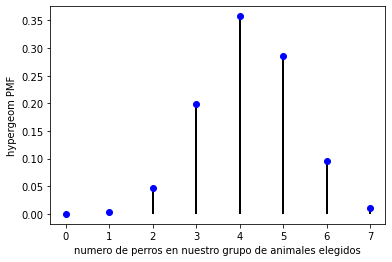

In [8]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np

"""
Supongamos que tenemos una colección de 20 animales, de los cuales 7 son perros. Entonces,
 si queremos saber la probabilidad de encontrar un número dado de perros si elegimos al azar 12 de los 20 animales,
  podemos inicializar una distribución congelada y trazar la función de masa de probabilidad:
"""
[M, n, N] = [20, 7, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('numero de perros en nuestro grupo de animales elegidos')
ax.set_ylabel('hypergeom PMF')
plt.show()

## *Uniforme*
(discreta)
Esta distribución Uniforme que surge en espacios de probabilidad equiprobables, es decir, en situaciones donde de n resultados diferentes, todos tienen la misma probabilidad de ocurrir.

Ejemplo:
*   El caso de los dados,donde un dado perfecto cada vez que se lanza tiene una probabilidad de 1/6
<br>

Parametros:
*  a: Minimo (entero >= 1; en Epidat a>=1)
*  b: Maximo (entero >=2; en Epidat:b>=2)

Funcion de distribucion:
<br>

$$F(x) = \left\{
	\begin{array}{ll}
          \frac{1}{n}, para& x =x1,x2,...,xn
           \
	\end{array}
\right.$$
<br>


[1 2 3 4 5 6]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


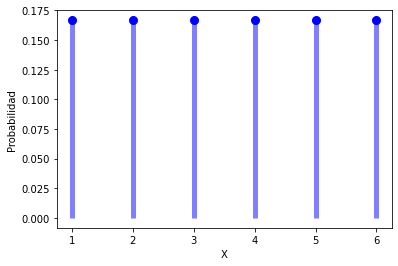

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

a=1
b=6

x = np.arange(a, b+1)

print(x)
discrete_uniform_distribution = randint(a, b+1)
discrete_uniform_pmf = discrete_uniform_distribution.pmf(x)

print(discrete_uniform_pmf)
plt.plot(x, discrete_uniform_pmf, 'bo', ms=8)
plt.vlines(x, 0, discrete_uniform_pmf, colors='b', lw=5, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.show()



## *Binomial Negativa*
Esta distribucion es utilizada en procesos en los cuales se ve necesaria la repetición de ensayos hasta conseguir un número de casos favorables (primer éxito).
<br>
Condiciones:

*   El proceso tiene un número indefinido de pruebas,que pare cuando llegue a un determinado numero de resultados favorables r.
*   Las pruebas se agrupan en dos resultados posibles y excluyentes a su vez, es decir, A y no A.
*   La probabilidad de obtener un resultado A en las pruebas es p, y la de conseguir no A es q, de forma que p+q=1.
*   p y q se establecen como constantes en cada prueba y a su vez estas son independientes.
<br>

Funcion de distribucion:
$$F(x|r,p) = \left\{
	\begin{array}{ll}
           \
            \frac{τ(r+x)}{τ(r)τ(x+1)}p^r(1-p)^r\\
	\end{array}
\right.$$
<br>
donde:
- x: valor de la magnitud aleatoria
- r:numero de pruebas exitosas
- p: pro
* Por ejemplo, una distribución binomial negativa puede modelar el número de veces que se lanza al aire una moneda para obtener cinco cruces. 

<br>
Funcion de probabilidad:

$$F(k) = \left\{
	\begin{array}{ll}
           \
            {k+n-1 \choose  n-1} p^n (1-p)^k
            \
	\end{array}
\right.$$
<br>
*  para: k>=0 , p>0 y p<=1
*  acepta  y  como parámetros de forma donde n es el número de éxitos,  es la probabilidad de un solo éxito, y  es la probabilidad de un solo fallo.

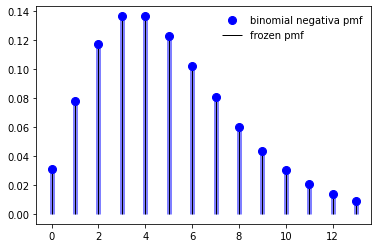

In [7]:
from scipy.stats import nbinom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 5, 0.5
mean, var, skew, kurt = nbinom.stats(n, p, moments='mvsk')

x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='binomial negativa pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = nbinom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

## *Pareto*
La distribución de Pareto fue desarrollada por el economista italiano Vilfredo Pareto (1848-1923) como un modelo para explicar la distribución de rentas entre los individuos de una población, asumiendo la existencia de un umbral más bajo (x0) y que no existen rentas por debajo de ese umbral y el decrecimiento de manera potencial del porcentaje de individuos con una renta superior o igual un cierto valor de renta en medio de dicho valor de renta La gama de aplicaciones para esta distribución ha crecido para incluir una variedad de campos de investigación.
<br>
-El parámetro x0 es un indicador de posición (valor mínimo) que, en términos económicos,puede interpretarse como el ingreso mínimo de la población. 
<br>
-El parámetro α(alfa) está asociado con la dispersión, donde a mayor valor se obtienen densidades de Pareto más concentradas en las proximidades de x0, es decir, menos dispersas.

$$F(x) = \left\{
	\begin{array}{ll}
           1- (\frac{x0}{x})^α & x>= x0\\
           0 & x< x0
	\end{array}
\right.$$
<br>


*   Tiene su aplicacion en la hidrología, se utiliza la distribución de Pareto para analizar variables aleatorias como valores máximos de la precipitación y la descarga de ríos, y además para describir épocas de sequía.





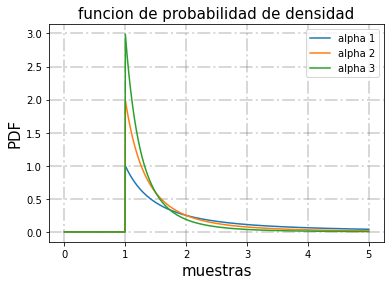

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
x_m = 1 #valor mas pequeño que puede tomar la variable aleatoria
alpha = [1, 2, 3] 
samples = np.linspace(start=0, stop=5, num=1000)
for a in alpha:
    output = np.array([pareto.pdf(x=samples, b=a, loc=0, scale=x_m)])
    plt.plot(samples, output.T, label='alpha {0}' .format(a))
plt.xlabel('muestras', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('funcion de probabilidad de densidad', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

## *T de Student*
Esta distribución fue propuesta y tabulada por William Sealy Gosset (1876-1937),,este se conoce por el seudónimo de Student,dado al resultado de un estudio sobre la estimación de la media cuando el tamaño de muestra es pequeño.
<br>
La distribución t de Student queda completamente definida por medio de sus grados de libertad,**n**, y se denota por **tn**.
<br>
Esta surge cuando se prevee estudiar el cociente entre una variable
aleatoria con distribución normal estándar y la raíz cuadrada del cociente entre una variable aleatoria con distribución ji-cuadrado y sus grados de libertad (n), siendo las dos variables independientes.
<br>
<br>
$$Fx(x) = \left\{
	\begin{array}{ll}
           \int_{-∞}^x f(u)du = 1-\frac{1}{2}I_x(t)(\frac{\upsilon}{2},\frac{1}{2})
	\end{array}
\right.$$

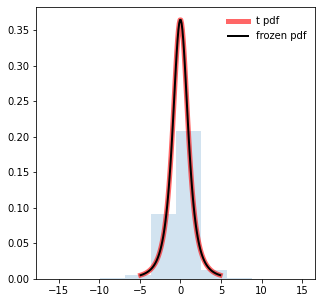

In [ ]:
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calcular los cuatro primeros momentos:
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')

#Muestre la función de densidad de probabilidad ( pdf):
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')

'''
Alternativamente, se puede llamar al objeto de distribución (como una función) para fijar los parámetros de forma, ubicación y escala.
Esto devuelve un objeto RV "congelado" que mantiene fijos los parámetros dados.

Congele la distribución y muestre lo congelado pdf:
'''
rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Compruebe la precisión de cdfy ppf:
vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

#Genera números aleatorios:
r = t.rvs(df, size=1000)

#Y compara el histograma:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

Ejemplo:El datset births del paquete de R openintro contiene información sobre 150 nacimientos así como información de las madres. Se quiere determinar si existen evidencias significativas de que el peso de los recién nacidos cuyas madres fuman (smoker) difiere de aquellos cuyas madres no fuman (nonsmoker).

In [ ]:
!pip install pingouin

     |████████████████████████████████| 182 kB 5.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 50.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193660 sha256=349edb60b9fe24c37a4f68c2787972ca7ad7a0e09a165d39284e30728b289a84
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=7d6fb3df8ec1c188a3e91f0d68c8f3beed4e00f593e1572b47c4beeb50aa0f4b
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg


In [ ]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/births.csv')
datos = pd.read_csv(url, sep=',')
datos.head(4)


,f_age,m_age,weeks,premature,visits,gained,weight,sex_baby,smoke
0,31.0,30,39,full term,13.0,1.0,6.88,male,smoker
1,34.0,36,39,full term,5.0,35.0,7.69,male,nonsmoker
2,36.0,35,40,full term,12.0,29.0,8.88,male,nonsmoker
3,41.0,40,40,full term,13.0,30.0,9.00,female,nonsmoker


In [ ]:
datos.groupby('smoke').size()

smoke
nonsmoker    100
smoker        50
dtype: int64

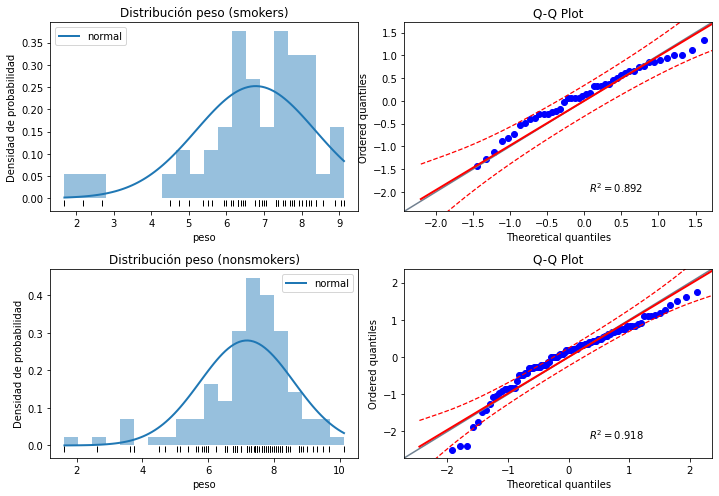

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

peso_smokers = datos.loc[datos.smoke == 'smoker', 'weight']
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_smokers)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_smokers), max(peso_smokers), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=peso_smokers, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(peso_smokers, np.full_like(peso_smokers, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución peso (smokers)')
axs[0, 0].set_xlabel('peso')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(peso_smokers, dist='norm', ax=axs[0, 1])

peso_nonsmokers = datos.loc[datos.smoke == 'nonsmoker', 'weight']
mu, sigma = stats.norm.fit(peso_nonsmokers)
x_hat = np.linspace(min(peso_nonsmokers), max(peso_nonsmokers), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=peso_nonsmokers, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(peso_nonsmokers, np.full_like(peso_nonsmokers, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución peso (nonsmokers)')
axs[1, 0].set_xlabel('peso')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(peso_nonsmokers, dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [ ]:
pg.normality(data=datos, dv='weight', group='smoke')

,W,pval,normal
smoker,0.894906,0.000328,False
nonsmoker,0.923736,0.000022,False


## *Chi cuadrado*
Esta distribución sigue la suma de los cuadrados de n
variables independientes e idénticamente distribuidas según una distribución normal estándar, N(0,1).
<br>
Esta distribución debe su nombre al matemático inglés Karl Pearson (1857-1936), es fundamental en inferencia estadística y en los tests estadísticos de bondad de ajuste.
<br>
Del mismo modo que los estadísticos “z”, con su distribución normal y “t”, con su distribución t de Student, nos han servido para someter a prueba hipótesis que involucran a promedios y porcentajes, el estadístico ji-cuadrado (o chi cuadrado), que tiene distribución de probabilidad del mismo nombre, nos servirá para someter a prueba hipótesis referidas a distribuciones de frecuencias.
<br>
$$Chicuadrado(x^2) = \left\{
	\begin{array}{ll}
          \
            [sum_{i=1}^{n}x_{i}= \frac{({X}_{i}-u)^2}{σ^2} =sum_{i=1}^{n}X_{i}^2\\
            \
	\end{array}
\right.$$
<br>
-Por tratarse se una suma solo toma los valores positivos
<br>
-Hay una distribucion chi-cuadrado para cada valor de los grados de libertad.
<br>

*   Tiene su aplicacion en la inferencia estadística. La más conocida es la 
denominada prueba χ², utilizada como prueba de independencia y como prueba de buen ajuste y en la estimación de varianzas.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


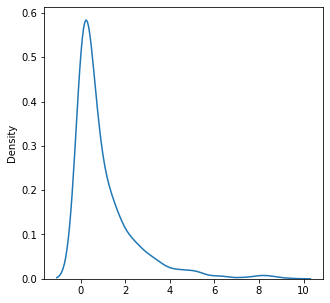

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.chisquare(df=1, size=1000), hist=False)

plt.show()

## *Beta*
La distribución beta es puntual para variables aleatorias continuas que toman valores en el intervalo (0,1), lo que la hace muy apropiada para modelar proporciones. En la inferencia bayesiana, por ejemplo, es muy utilizada como distribución a prioridad cuando las observaciones tienen una distribución binomial.
<br>
$$F(x) = \left\{
	\begin{array}{ll}
            0 & x<=0 \\
            \frac{1}{β(p,q)}\int_0^x (1-x)^{q-1}dx  & 0 < x < 1\\
            1 & x>=1
	\end{array}
\right.$$
<br>

* Fracción de tiempo que un equipo está en reparación.
- Proporción de piezas defectuosas en un lote.
- Proporción del gasto de una familia en alimentación con respecto a los gastos totales.
- La participación de la producción de una empresa con respecto al total de lo producido en
ese sector.



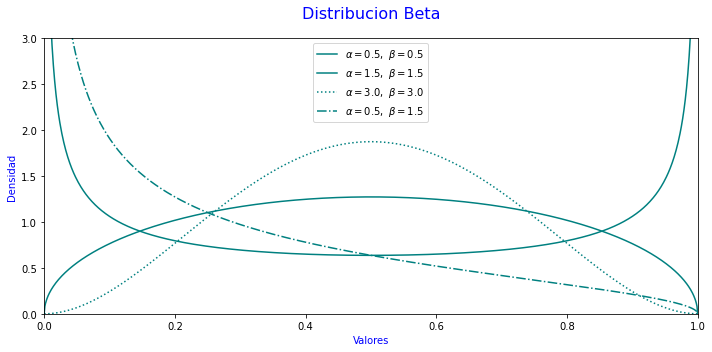

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

alphas = [0.5, 1.5, 3.0, 0.5]
betas = [0.5, 1.5, 3.0, 1.5]
lines = ['-', '-', ':', '-.']
x = np.linspace(0, 1, 1001)
fig, ax = plt.subplots(figsize=(10,5))
for a, b, l in zip(alphas, betas, lines):
  s = stats.beta(a, b)
  plt.plot(x, s.pdf(x), color='teal', label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b), ls=l);

plt.xlim(0, 1)
plt.ylim(0, 3)
plt.title('Distribucion Beta', size=16, color='blue', pad=20)
plt.xlabel('Valores', color='blue')
plt.ylabel('Densidad', color='blue')
plt.legend(loc=0)

plt.tight_layout()
plt.show()

## *Gamma*
Es una distribución con numerosos usos, entre los que se encuentra el siguiente: supongamos
que una pieza metálica se encuentra sometida a cierta fuerza, de manera que se romperá después
de aplicar un número específico de ciclos de fuerza. Si los ciclos ocurren de manera independiente
y a una frecuencia promedio, entonces el tiempo que transcurre antes de que el material se rompa
es una variable aleatoria con distribución gamma.
<br>

$$F(x) = \left\{
	\begin{array}{ll}
            0 & x<=0 \\
            \frac{a^p}{τ(p)}\int_0^x t^{p-1}e^{-at} dt  & 0 < x < 1\\
	\end{array}
\right.$$
<br>


*   La distribución gamma tiene muchas aplicaciones a experimentos o fenómenos aleatorios
que tienen asociadas variables aleatorias que siempre son no negativas y cuyas distribuciones
son sesgadas a la derecha, es decir, el área bajo la función de densidad disminuye a medida que
nos alejamos del origen




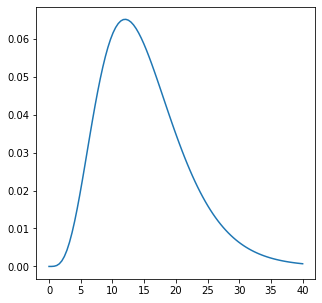

In [ ]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

#define valores x.axis
x = np.linspace (0, 40, 100) 

#calcula gamma
y = stats.gamma.pdf(x, a=5, scale=3)

#plot graficar
plt.plot(x, y)

#mostrar grafica
plt.show()

## *Log-normal*
Utilice la distribución lognormal si el logaritmo de la variable aleatoria está distribuida normalmente. Utilícese cuando las variables aleatorias sean mayores que 0. Por ejemplo, la distribución lognormal se usa para el análisis de fiabilidad y en aplicaciones financieras, como modelar el comportamiento de las acciones.
<br>
La distribución log-normal, propuesta por Galton en 1879, es la exponencial de una variable normal.Esta es una distribución de probabilidad continua de una variable aleatoria cuyo logaritmo está normalmente distribuido. Es decir, si X es una variable aleatoria con una distribución normal, entonces exp(X) tiene una distribución log-normal.

<br>
<br>
$$F(x) = \left\{
	\begin{array}{ll}
            Φ(\frac{In x - u}{σ})\\
	\end{array}
\right.$$
<br>

* Tiene su aplicacion en la hidrología,donde se utiliza la distribución log-normal para analizar variables aleatorias como valores máximos de la precipitación y la descarga de ríos,2​ y además para describir épocas de sequía.



RV : 
Random Variates : 
 3.270886317422255

Probability Distribution : 
 [0.02619234 0.02690484 0.02765301 0.0284395  0.02926727 0.03013955
 0.03105993 0.03203241 0.03306142 0.03415191]
Distribution : 
 [0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


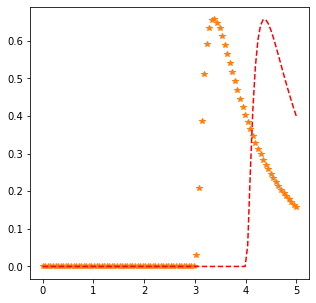

In [ ]:
from scipy.stats import lognorm
	
numargs = lognorm.numargs
a, b = 4.32, 3.18
rv = lognorm(a, b)
	
print ("RV : \n", rv)
import numpy as np
quantile = np.arange (0.01, 1, 0.1)


R = lognorm.rvs(a, b)
print ("Random Variates : \n", R)


R = lognorm.pdf(a, b, quantile)
print ("\nProbability Distribution : \n", R)

import numpy as np
import matplotlib.pyplot as plt
	
distribution = np.linspace(0, np.minimum(rv.dist.b, 3))
print("Distribution : \n", distribution)
	
plot = plt.plot(distribution, rv.pdf(distribution))
import matplotlib.pyplot as plt
import numpy as np
	
x = np.linspace(0, 5, 100)
	
# Varying positional arguments
y1 = lognorm .pdf(x, 1, 3)
y2 = lognorm .pdf(x, 1, 4)
plt.plot(x, y1, "*", x, y2, "r--")


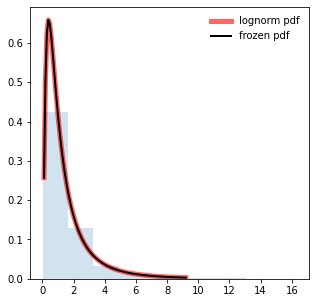

In [ ]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calcular los cuatro primeros momentos:
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

#Muestre la función de densidad de probabilidad ( pdf):
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

'''
Alternativamente, se puede llamar al objeto de distribución (como una función) para fijar los parámetros de forma, ubicación y escala. 
Esto devuelve un objeto RV "congelado" que mantiene fijos los parámetros dados.

Congele la distribución y muestre lo congelado pdf:
'''
rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Compruebe la precisión de cdfy ppf:
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))

#Genera números aleatorios:
r = lognorm.rvs(s, size=1000)

#Y compara el histograma:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Bibliografia
https://www.sergas.es/Saude-publica/Documents/1899/Ayuda_Epidat_4_Distribuciones_de_probabilidad_Octubre2014.pdf

https://www.ugr.es/~proman/ProbI/2016_2017/PDF/DistribucionesContinuas.pdf